# Machine Learning on Housing Dataset

## Dependencies

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [113]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

## Initial Data Exploration

__Importing__

In [114]:
df = pd.read_csv("Datasets/Housing.csv")

In [115]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


__Shape__

In [116]:
shape = df.shape
print("No. of rows: ",shape[0])
print("No. of cols: ",shape[1])

No. of rows:  21613
No. of cols:  21


__Info__

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Our target variable is Price for this Data set

In [118]:
print("Our target varibale: \n", df['price'])

Our target varibale: 
 0        231300.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


__Features( Columns )__

In [119]:
for col in df.columns:
    print(col, end=", ")

id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, 

## Data Cleaning

As there are no missing and duplicates, then we directly jump to detecting outliers

### Converting each float into 2 decimal places

In [120]:
df['lat'] = round(df['lat'],2)
df['long'] = round(df['long'],2)

### Convert to datetime

In [121]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.62,-122.04,1800,7503


### Outliers

We can see that no. of bedrooms ranging from 0-10 is more but x axis still shows max xlim till 30 that means there are houses that have more than 10

In [122]:
df[df['bedrooms'] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.56,-122.36,1420,4960
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.59,-122.11,2730,10400
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.57,-122.18,2040,11914
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.66,-122.32,1810,3745


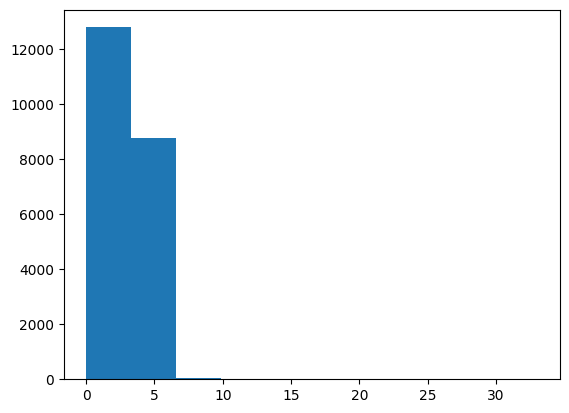

In [123]:
plt.hist(df['bedrooms'])
plt.show()

Now, if we put this dataset in linear regression it might give more importance to houses having more than 30 bedrooms, that is problematic for us

so we have to remove it

In [124]:
loc = df.loc[df['bedrooms'] >= 10].index
cleanData = df.drop(loc,axis=0)

In [125]:
cleanData.loc[df['bedrooms'] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


__Data cleaning done__

## Feature Engineering

1. How much sqft does 1 bedroom consist of

In [126]:
cleanData['sqft_per_bedroom'] = round(cleanData['sqft_living']/cleanData['bedrooms'],2)
cleanData

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_per_bedroom
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,590.00
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,856.67
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,385.00
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,490.00
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.62,-122.04,1800,7503,560.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509,510.00
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200,577.50
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007,510.00
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287,533.33


2. Year a house was sold

In [127]:
cleanData['sale_year'] = cleanData['date'].dt.year

In [128]:
cleanData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_per_bedroom,sale_year
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,590.00,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,856.67,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,385.00,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,490.00,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.62,-122.04,1800,7503,560.00,2015


3. At what age a house get sold( Effective Age )

effective_age = sale_year - max(yr_built, yr_renovated)

In [129]:
cleanData['effective_age'] = cleanData['sale_year'] - cleanData[['yr_built','yr_renovated']].max(axis=1)

In [130]:
cleanData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_per_bedroom,sale_year,effective_age
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,590.00,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,856.67,2014,23
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,385.00,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,490.00,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.62,-122.04,1800,7503,560.00,2015,28


__Feature Engineering Completed__

## Train - Test Split

In [131]:
from sklearn.preprocessing import StandardScaler

In [135]:
scalerModel = StandardScaler()
column = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_per_bedroom', 'sale_year', 'effective_age']
# Ensure numeric dtype for these columns (if some are strings) and coerce errors to NaN
cleanData[column] = cleanData[column].apply(pd.to_numeric, errors='coerce')
# Replace infinite values with NaN then drop rows that have NaN in any of the selected columns
cleanData.replace([np.inf, -np.inf], np.nan, inplace=True)
cleanData.dropna(subset=column, inplace=True)
# Now scale
scaledData = scalerModel.fit_transform(cleanData[column])
scaled_df = pd.DataFrame(scaledData, columns=column)

In [136]:
scaled_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_per_bedroom,sale_year,effective_age
0,-0.841176,-1.522906,-1.450250,-0.980237,-0.228263,-0.915375,-0.087209,-0.305647,-0.629767,-0.560052,-0.734899,-0.658845,-0.544857,-0.210100,1.869721,-0.361118,-0.327321,-0.943510,-0.260734,-0.130837,-0.690787,0.626776
1,-0.005787,-0.411440,0.175113,0.533893,-0.189822,0.937599,-0.087209,-0.305647,-0.629767,-0.560052,0.461035,0.245157,-0.681050,4.747334,0.879268,1.154159,-0.753549,-0.432755,-0.187813,1.104714,-0.690787,-0.622706
2,-0.980907,-1.522906,-1.450250,-1.426851,-0.123226,-0.915375,-0.087209,-0.305647,-0.629767,-1.411825,-1.230184,-0.658845,-1.293917,-0.210100,-0.933448,1.298471,-0.114207,1.070322,-0.172304,-1.080655,1.447623,1.425056
3,0.173983,0.700025,1.150331,-0.130582,-0.243959,-0.915375,-0.087209,-0.305647,2.444682,-0.560052,-0.891940,1.397759,-0.204376,-0.210100,1.084833,-0.288962,-1.250815,-0.914324,-0.284565,-0.594163,-0.690787,0.279697
4,-0.082054,-0.411440,-0.149959,-0.435586,-0.169588,-0.915375,-0.087209,-0.305647,-0.629767,0.291721,-0.130892,-0.658845,0.544684,-0.210100,-0.073810,0.432599,1.235516,-0.272232,-0.192799,-0.269835,1.447623,-0.449167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,-0.490623,-0.411440,0.500186,-0.598981,-0.337381,2.790574,-0.087209,-0.305647,-0.629767,0.291721,-0.312094,-0.658845,1.293743,-0.210100,0.468136,1.009847,-0.966663,-0.666243,-0.412554,-0.501498,-0.690787,-1.247448
21591,-0.381671,0.700025,0.500186,0.250674,-0.224328,0.937599,-0.087209,-0.305647,-0.629767,0.291721,0.630157,-0.658845,1.463984,-0.210100,1.271711,-0.361118,-1.037701,-0.228453,-0.203907,-0.188753,1.447623,-1.386279
21592,-0.375949,-1.522906,-1.775322,-1.154525,-0.332093,0.937599,-0.087209,-0.305647,-0.629767,-0.560052,-0.928181,-0.658845,1.293743,-0.210100,1.234336,0.216131,-0.611473,-1.410485,-0.394296,-0.501498,-0.690787,-1.247448
21593,-0.381671,-0.411440,0.500186,-0.522730,-0.307029,0.937599,-0.087209,-0.305647,-0.629767,0.291721,-0.227533,-0.658845,1.123502,-0.210100,-0.952136,-0.216806,1.022402,-0.841359,-0.420693,-0.393404,1.447623,-1.039201


In [137]:
from sklearn.model_selection import train_test_split
# Split features and target
X = scaled_df.drop('price', axis=1)
y = scaled_df['price']
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((17276, 21), (4319, 21), (17276,), (4319,))

## Model Selection and Model Tuning

For this project we are choosing Linear Regression Model

In [138]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [139]:
# Train the model on the training data
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [140]:
# Make predictions on the test data
predictions = model.predict(X_test_scaled)

### Model Evaluation

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [144]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.2917052908444622
R-squared (R²): 0.7182757120224226
